In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# 忽略警告信息
import warnings
warnings.filterwarnings("ignore")

## 数据集的准备

In [3]:
train = pd.read_csv('datas/house_data.csv')
y = train['SalePrice']
train.shape

(1460, 82)

In [4]:
train1 = train.drop(['Id', 'SalePrice'], axis=1)
train1.shape

(1460, 80)

In [5]:
# 变成one_hot形式，内容全部被数字化了,原特征删除
X = pd.get_dummies(train1).reset_index(drop=True)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=123)

In [7]:
X_train.shape

(1168, 303)

In [8]:
X_test.shape

(292, 303)

<br><br>

## 基础线性回归

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error #方差

In [10]:
lm=LinearRegression()

In [13]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
pred=lm.predict(X_test)

In [15]:
np.sqrt(mean_squared_error(np.log(y_test), np.log(pred)))

0.12627809622157107

In [16]:
np.sqrt(mean_squared_error(y_test, pred))

24973.913406557556

In [17]:
def benchmark(model):
    pred = model.predict(X_test)
    # 方差
    logrmse = np.sqrt(mean_squared_error(np.log(y_test), np.log(pred)))
    return logrmse

In [18]:
benchmark(lm)

0.12627809622157107

## 数据预处理 Preprocessing

先用机器学习参数去跑结果

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [20]:
# 把机器学习方法，直接放进 make_pipeline
lm_model = make_pipeline(RobustScaler(), LinearRegression())

In [21]:
# 将数据变换后的数据，进行机器学习
lm_model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [22]:
# 评测模型
benchmark(lm_model)

0.1262780962215701

In [23]:
benchmark(lm)

0.12627809622157107

<br><br>

## RidegeRegression

### 朴素的Ridge回归

In [24]:
from sklearn.linear_model import Ridge

In [25]:
ridge_model = Ridge(alpha=0.1)

In [26]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [27]:
benchmark(ridge_model)

0.12658320875064985

### 数据预处理的Ridge回归

In [28]:
ridge_model_pipe=make_pipeline(RobustScaler(), Ridge(alpha=0.1))

In [29]:
ridge_model_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('ridge', Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [30]:
benchmark(ridge_model_pipe)

0.12658566764241647

### 带有CV的Ridge回归

cross view data K折交叉

In [31]:
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeCV

In [32]:
kfolds=KFold(n_splits=10, shuffle=True, random_state=123)

In [33]:
r_alphas=[0.01, 0.1, 1, 3, 5, 7, 10, 100]

In [34]:
ridge_model_cv=make_pipeline(RobustScaler(), RidgeCV(alphas=r_alphas, cv=kfolds))

In [35]:
# RidgeCV()

In [36]:
ridge_model_cv.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('ridgecv', RidgeCV(alphas=array([1.e-02, 1.e-01, 1.e+00, 3.e+00, 5.e+00, 7.e+00, 1.e+01, 1.e+02]),
    cv=KFold(n_splits=10, random_state=123, shuffle=True),
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False))])

In [37]:
benchmark(ridge_model_cv)

0.12385966794851841

In [39]:
def benchmark2(model, testset, label):
    pred=model.predict(testset)
    if pred[pred<0.].shape[0]>0:
        print('Neg Value') #拟合过程飞掉
    rmse=np.sqrt(mean_squared_error(label, pred))
    lrmse=np.sqrt(mean_squared_error(np.log(label), np.log(pred)))
    print('RMSE:', rmse)
    print('LRMSE:', lrmse)
    return lrmse

In [40]:
benchmark2(ridge_model_cv, X_test, y_test)

RMSE: 26907.89401651115
LRMSE: 0.12385966794851841


0.12385966794851841

In [41]:
r_alphas2=[.0001, .0003, .0005, .0007, .0009, .01, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 20, 30, 50, 60, 70, 80]

In [42]:
def ridge_train_test(alpha):
    m = make_pipeline(RobustScaler(), RidgeCV(alphas=[alpha], cv=kfolds))
    m.fit(X_train, y_train)
    return benchmark2(m, X_test, y_test)

In [43]:
ridge_train_test(.0001)

RMSE: 24973.969249187514
LRMSE: 0.12627904574538876


0.12627904574538876

In [ ]:
# 要写很多很多野代码
scores=[]
for k in r_alphas2:
    scores.append(ridge_train_test(k))

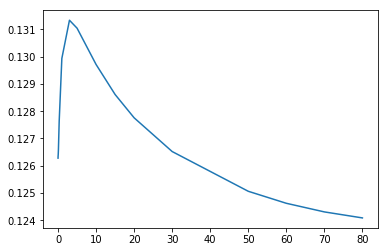

In [45]:
# 每一个alpha 的表现情况
plt.plot(r_alphas2, scores)

### RidgeCV自动筛选参数
找到 alpha 最好的参数

In [46]:
# 从e-10,到e2.8 平均抽样150个
r_alphas3=np.logspace(-10, 2.8, 150)

In [ ]:
scores=[]
for k in r_alphas3:
    scores.append(ridge_train_test(k))

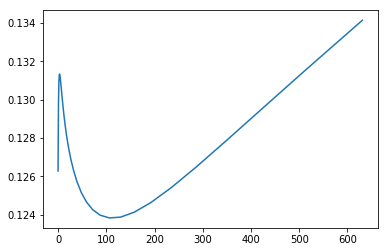

In [48]:
plt.plot(r_alphas3, scores)

可以使用自动优化筛选出最优的alpha

In [49]:
ridge_model2 = make_pipeline(RobustScaler(), RidgeCV(
        alphas=r_alphas3, cv=kfolds
)).fit(X_train, y_train)

In [50]:
benchmark2(ridge_model2, X_test, y_test)

RMSE: 25983.546991372652
LRMSE: 0.12570253861398775


0.12570253861398775

In [70]:
ridge_model2.steps

[('robustscaler',
  RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
         with_scaling=True)),
 ('ridgecv',
  RidgeCV(alphas=array([1.00000e-10, 1.21873e-10, ..., 5.17719e+02, 6.30957e+02]),
      cv=KFold(n_splits=10, random_state=123, shuffle=True),
      fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
      store_cv_values=False))]

In [51]:
# 最好的alpha
ridge_model2.steps[1][1].alpha_

39.56538865832277

### 和曲线得到的最优alpha不一样？
- 图表示全部是测试集，最好的alpha
- 自动化筛选，是不知道测试集合的分布的
  - 既参考了训练集的均值、方差、loss，也考虑了模型复杂度，挑出来是最优的
  - `steps[1][1].alpha_` 更科学
- 单把20%数据当测试集是不对的，比赛时不根本不知道评测集的

<br><br>

## LassoRegression

### 带有CV的Lasso回归

In [53]:
from sklearn.linear_model import LassoCV

In [54]:
l_alphas=np.logspace(-10, 2.8, 150)

In [73]:
def lasso_train_test(alpha):
    lasso_model = make_pipeline(RobustScaler(), LassoCV(alphas=[alpha], cv=kfolds))
    lasso_model.fit(X_train, y_train)
    lrmse = benchmark2(lasso_model, X_test, y_test)
    return lrmse

In [ ]:
scores = []
for k in l_alphas:
    print("Alpha:", k)
    scores.append(lasso_train_test(k))

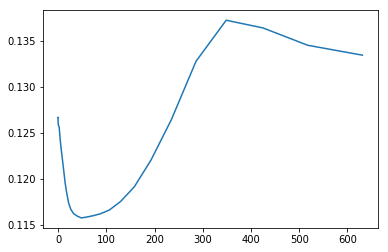

In [76]:
plt.plot(l_alphas, scores)

In [77]:
# 仅仅代表我们分出来的测试集，并不代表线上另外的测试集
lasso_train_test(50)

RMSE: 24601.931715190687
LRMSE: 0.11575377693141331


0.11575377693141331

### LassoCV自动筛选参数

In [63]:
lasso_model2=make_pipeline(RobustScaler(), LassoCV(
    alphas=l_alphas, cv=kfolds
)).fit(X_train, y_train)

In [65]:
benchmark2(lasso_model2, X_test, y_test)

RMSE: 25431.111829508853
LRMSE: 0.12203176481488645


0.12203176481488645

In [72]:
lasso_model2.steps[1][1].alpha_

192.5589718453296

<br><br>

## ElasticNet

### 带有CV的ElasticNet回归

In [78]:
from sklearn.linear_model import ElasticNetCV

In [80]:
e_l1ratio = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.85,0.9,0.95,1]

In [79]:
e_alphas = l_alphas

In [86]:
def elastic_train_test(alpha, l1ratio):
    e_model = make_pipeline(RobustScaler(), ElasticNetCV(
        alphas=[alpha], l1_ratio=[l1ratio]
    )).fit(X_train, y_train)
    lrmse = benchmark2(e_model, X_test, y_test)
    return lrmse

In [87]:
elastic_train_test(50,0.5)

RMSE: 64803.88956616406
LRMSE: 0.3056812482960621


0.3056812482960621

### ElasticNetCV自动筛选参数

In [88]:
elastic_model2 = make_pipeline(RobustScaler(), ElasticNetCV(
    alphas=e_alphas, l1_ratio=e_l1ratio
)).fit(X_train,y_train)

In [89]:
benchmark2(elastic_model2, X_test, y_test)

RMSE: 25431.111829508853
LRMSE: 0.12203176481488645


0.12203176481488645

In [92]:
elastic_model2.steps[1][1].alpha_

192.5589718453296

In [91]:
elastic_model2.steps[1][1].l1_ratio_

1.0